# Lab 10 - Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification

## Introduction

In this lab, we will tackle the problem of classifying images as containing a dog or a cat. This problem is quite common in computer vision, and it provides a good introduction to deep learning and image classification in general. Moreover, classifying images using Python is a good example of how to process and prepare data, use neural networks, and evaluate models. There will be two different models for this task:

one built and trained from scratch, the custom Convolutional Neural Network, and

another one generated as a result of transfer learning, called VGG16.

Later in the lab, you will have the opportunity to compare both models and define the best one. The dataset we will use in this lab originated from the “Dogs vs. Cats” on Kaggle. This dataset contains thousands of images of cats and dogs. We will explore the dataset, prepare it for training our models, and perform several passes on different models to compare the results.


## Data Preparation
Unzipping the data and then using the data

In [1]:
# Imported libraries
import os
import zipfile

# Define the path to the zip files
train_zip_path = '/content/train.zip'
test_zip_path = '/content/test1.zip'

# Define the extraction path
extraction_path = '/content/'

# Unzip the training dataset
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Unzip the test dataset
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Datasets unzipped successfully.")


Datasets unzipped successfully.


### USED UNZIPPING METHOD IN CLOUD BECAUSE DATA WAS ENRYPTED

## Data Exploration and EDA

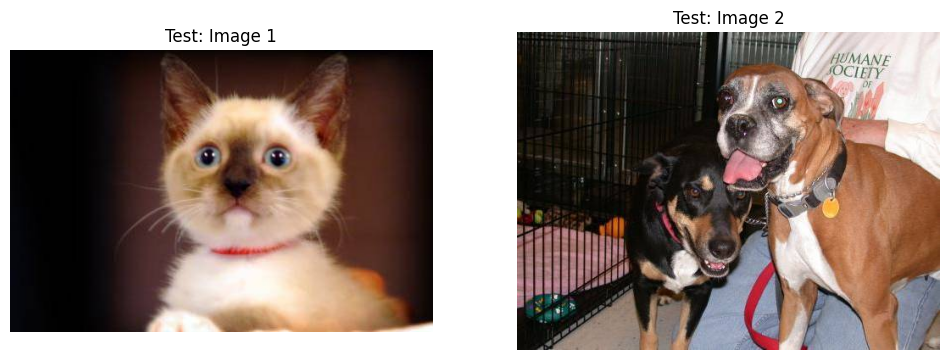

In [2]:
import matplotlib.pyplot as plt
import os

train_path = '/content/train'
test_path = '/content/test1'

# Displaying some images from the dataset
def display_sample_images(path, title):
    plt.figure(figsize=(12, 6))

    # Get list of all images
    all_images = os.listdir(path)

    # Displaying the first two images
    for i in range(2):
        if i < len(all_images):
            plt.subplot(1, 2, i+1)
            img_path = os.path.join(path, all_images[i])
            img = plt.imread(img_path)
            plt.imshow(img)
            plt.title(f'{title}: Image {i+1}')
            plt.axis('off')

    plt.show()
display_sample_images(test_path, 'Test')

In [ ]:
import pandas as pd
filenames = os.listdir(train_path)
# Created a list of labels based on the filenames
labels = []
for filename in filenames:
    if 'cat' in filename:
        labels.append('cat')
    elif 'dog' in filename:
        labels.append('dog')

# Create a DataFrame
df = pd.DataFrame({
    'Filename': filenames,
    'Label': labels
})
label_counts = df['Label'].value_counts()

df.head()

Filename Label
0   dog.1811.jpg   dog
1   cat.5411.jpg   cat
2  dog.12398.jpg   dog
3   cat.4161.jpg   cat
4   cat.6102.jpg   cat

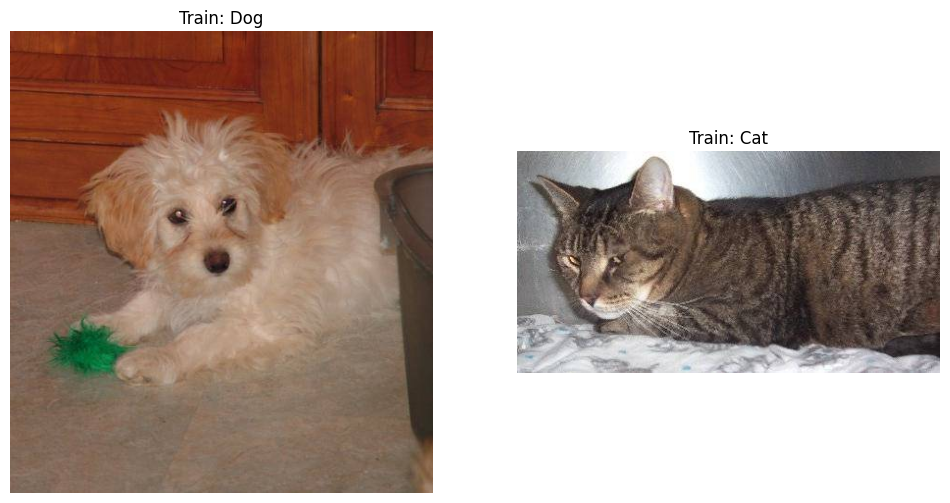

In [ ]:
# Displaying some more images from the dataset
def display_sample_images(path, title):
    plt.figure(figsize=(12, 6))

    # Get list of all images
    all_images = os.listdir(path)

    # Separate dog and cat images
    dog_images = [img for img in all_images if 'dog' in img]
    cat_images = [img for img in all_images if 'cat' in img]

    # Check if there are any dog images
    if dog_images:
        # Display a dog image
        plt.subplot(1, 2, 1)
        img_path = os.path.join(path, dog_images[0])
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f'{title}: Dog')
        plt.axis('off')

    # Check if there are any cat images
    if cat_images:
        # Display a cat image
        plt.subplot(1, 2, 2)
        img_path = os.path.join(path, cat_images[0])
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f'{title}: Cat')
        plt.axis('off')

    plt.show()

display_sample_images(train_path, 'Train')

In [ ]:
from PIL import Image
import numpy as np

# Count the number of images for each label
label_counts = df['Label'].value_counts()
print(label_counts)

dog    12500
cat    12500
Name: Label, dtype: int64


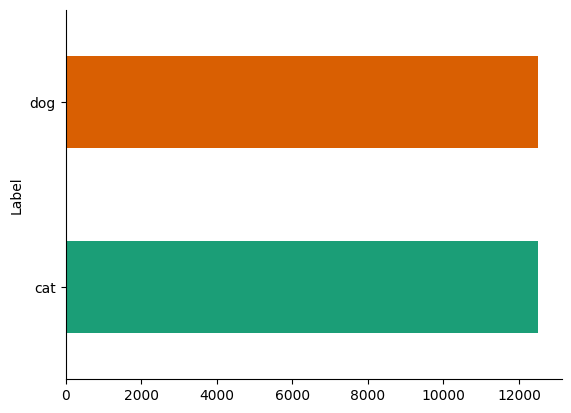

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

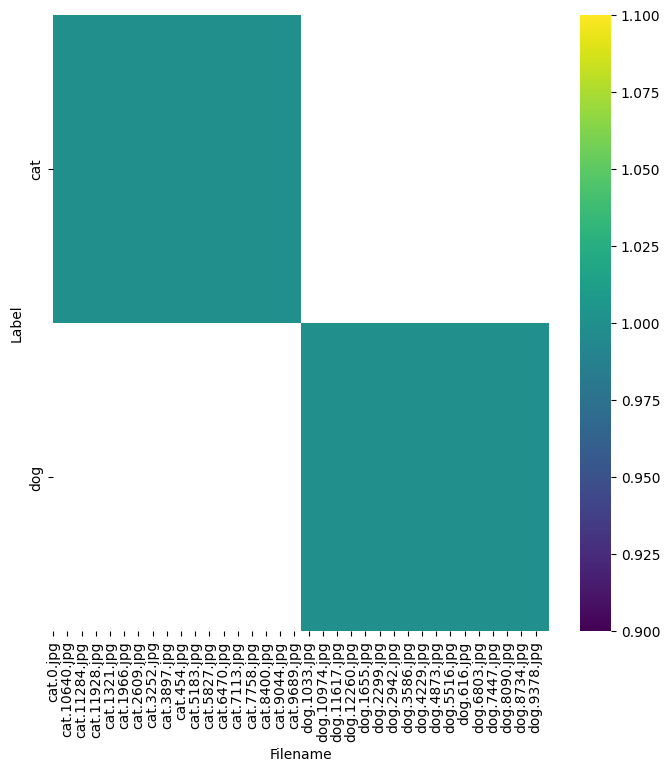

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Label'].value_counts()
    for x_label, grp in df.groupby('Filename')  # Fix: Convert 'train_path' to 'df'
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Filename')
_ = plt.ylabel('Label')

### Seperating Dogs and Cats Images in their own folders

In [3]:
import os
import shutil

# Targeting directories for 'dog' and 'cat'
dog_dir = os.path.join(train_path, 'dog')
cat_dir = os.path.join(train_path, 'cat')

# Created target directories if they don't exist
if not os.path.exists(dog_dir):
    os.makedirs(dog_dir)
if not os.path.exists(cat_dir):
    os.makedirs(cat_dir)

# Moving files to their respective directories
for filename in os.listdir(train_path):
    if filename.startswith('dog') and filename.endswith('.jpg'):
        source = os.path.join(train_path, filename)
        destination = os.path.join(dog_dir, filename)
        if not os.path.exists(destination):  # Check if file does not already exist in the target directory
            shutil.move(source, destination)
    elif filename.startswith('cat') and filename.endswith('.jpg'):
        source = os.path.join(train_path, filename)
        destination = os.path.join(cat_dir, filename)
        if not os.path.exists(destination):  # Check if file does not already exist in the target directory
            shutil.move(source, destination)
print("Successfully seperated Dogs and Cats data in their Seperate Folder")

Successfully seperated Dogs and Cats data in their Seperate Folder


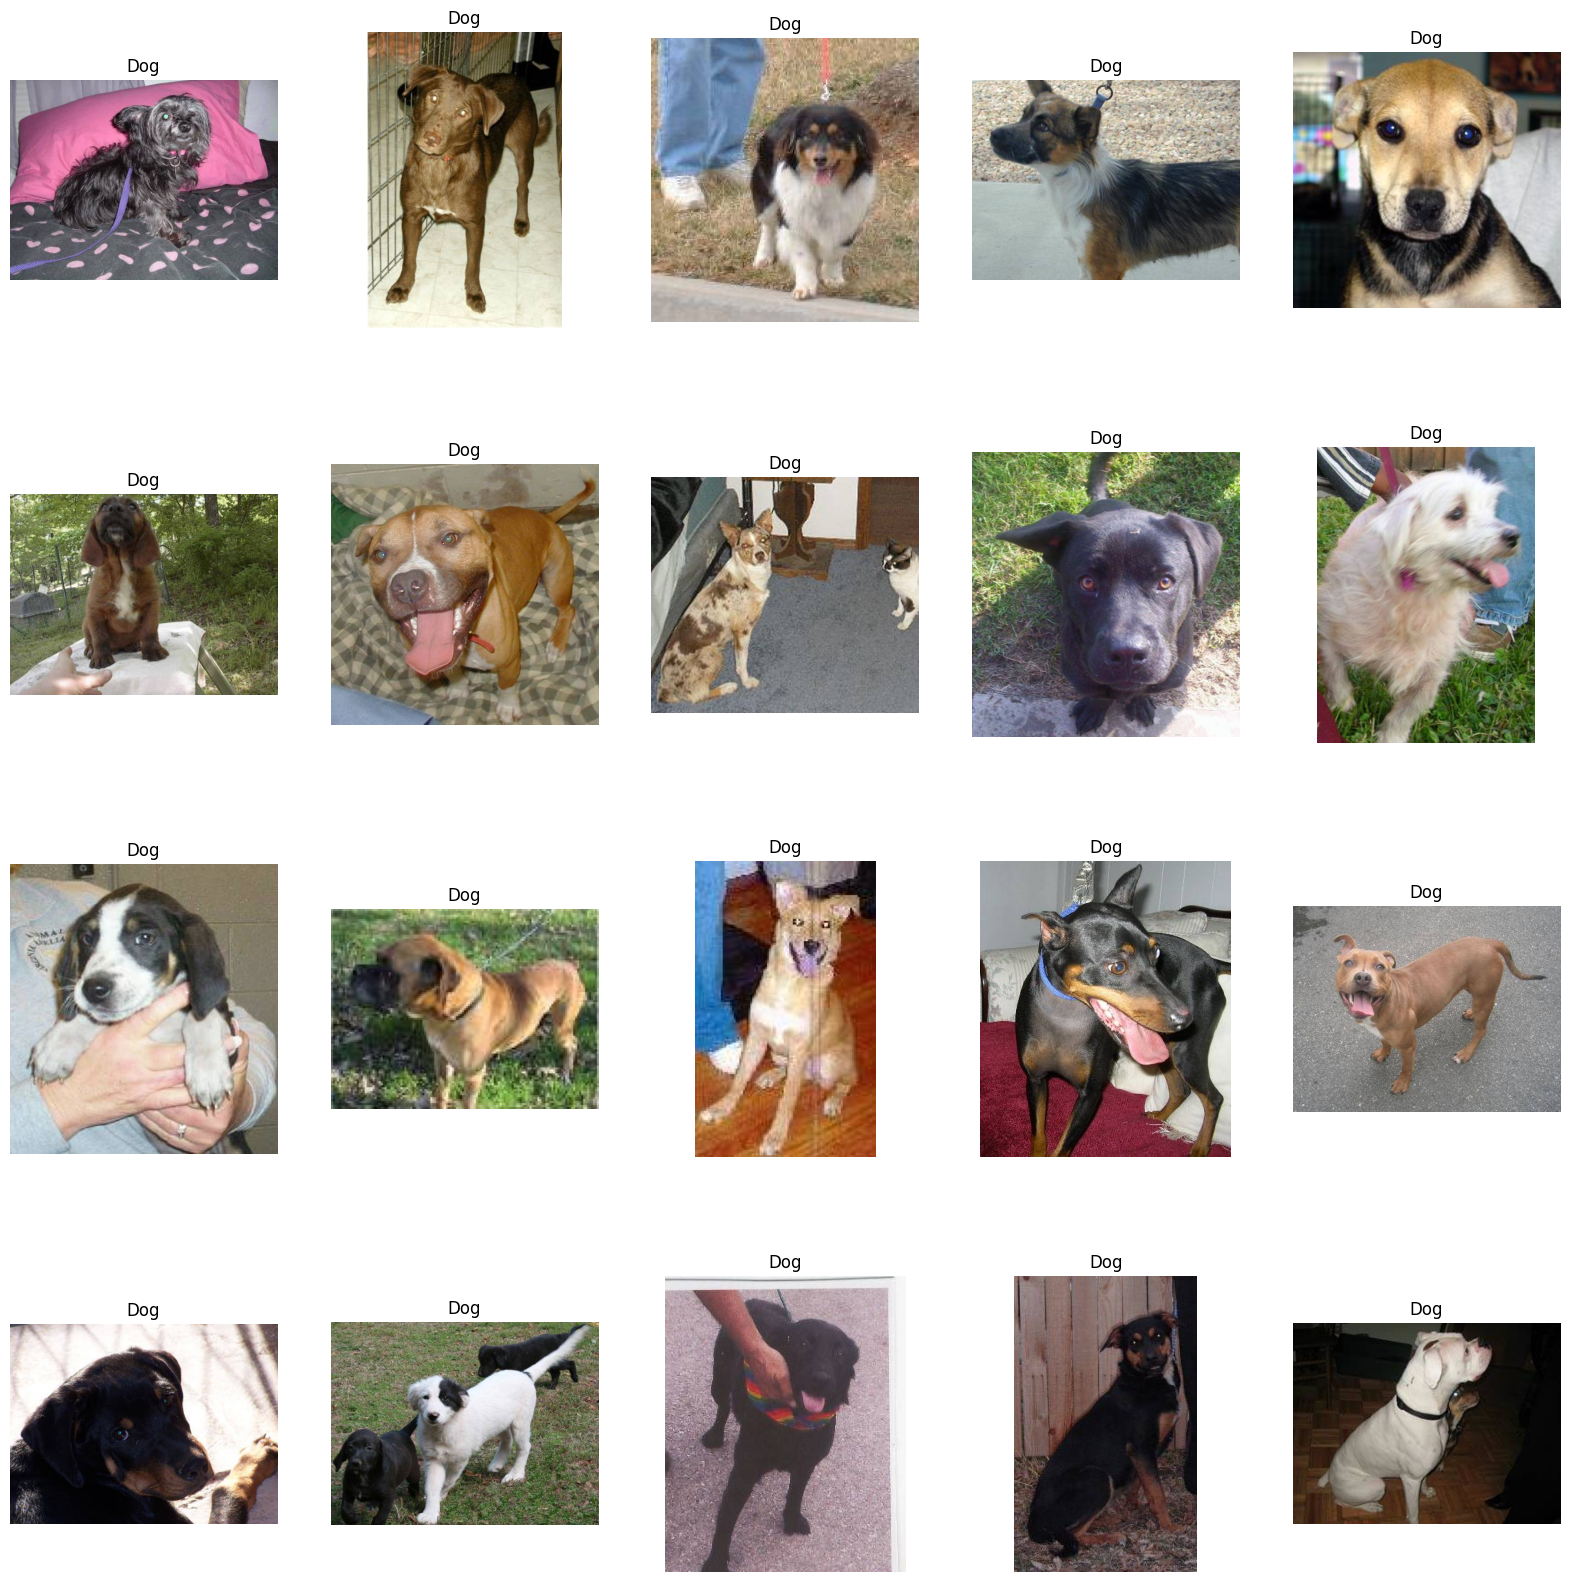

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread

plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

train_path_new = '/content/train/dog'  # replace with your actual train dataset path

for i in range(20):  # change to display the first 20 dog images
    plt.subplot(4,5,i+1)    # change to accommodate 20 images in a 4x5 grid
    filename = train_path_new + '/dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

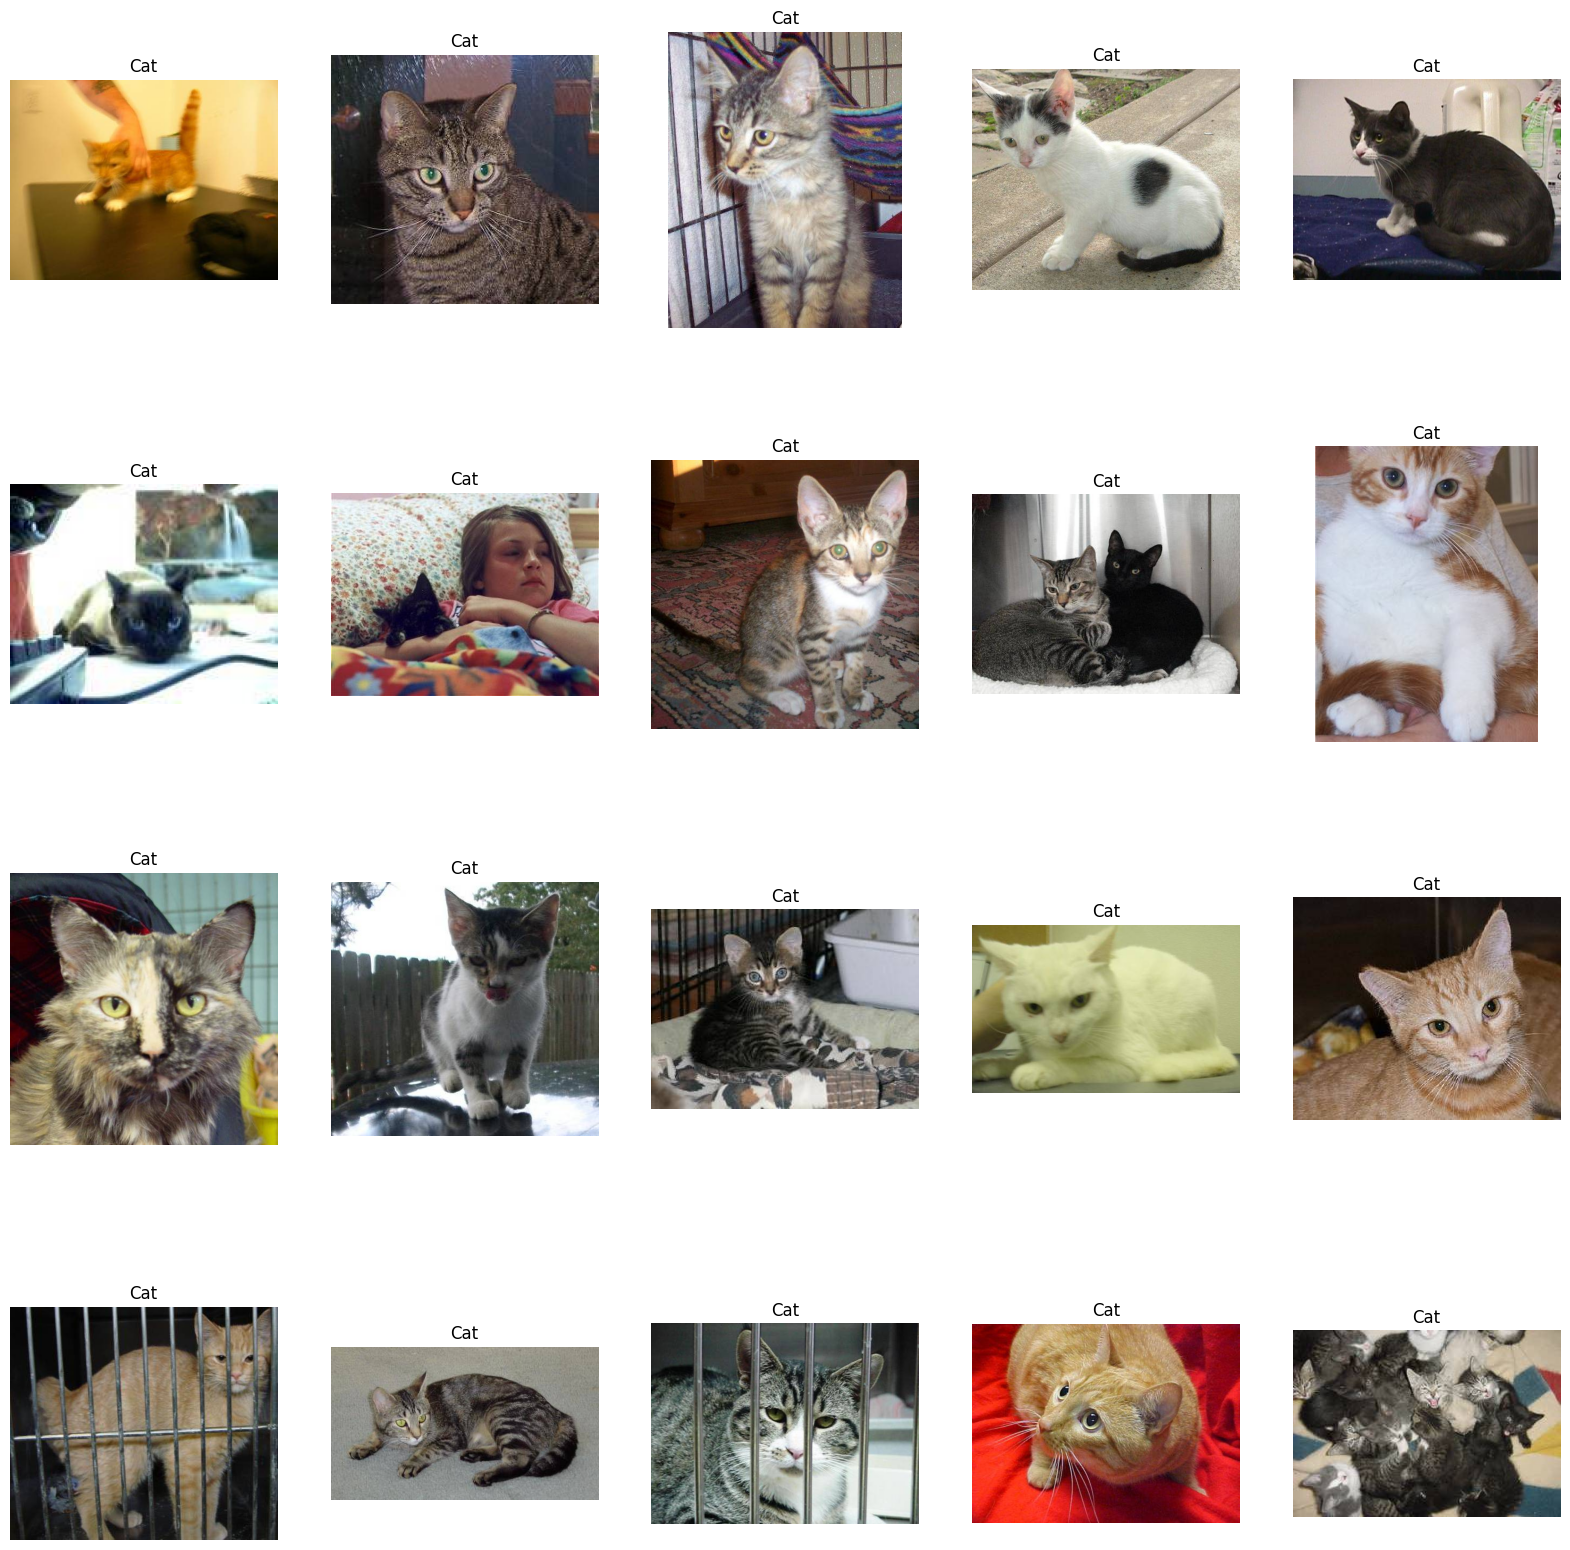

In [ ]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

train_path_new = '/content/train/cat/'  # replace with your actual train dataset path

for i in range(20):  # change to display the first 20 cat images
    plt.subplot(4,5,i+1)    # change to accommodate 20 images in a 4x5 grid
    filename = train_path_new + '/cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

### Spliting Data into Validation Data

In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Defined directories
train_dir = '/content/train'
val_dir = '/content/validation'

# Created validation directory
os.makedirs(val_dir, exist_ok=True)

# Created subdirectories for each class in the validation directory
os.makedirs(os.path.join(val_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cat'), exist_ok=True)

# Geting list of all images for each class
dog_images = os.listdir(os.path.join(train_dir, 'dog'))
cat_images = os.listdir(os.path.join(train_dir, 'cat'))

# Spliting into training and validation sets
train_dog_images, val_dog_images = train_test_split(dog_images, test_size=0.2, random_state=42)
train_cat_images, val_cat_images = train_test_split(cat_images, test_size=0.2, random_state=42)

# Moving validation images to validation directory
for image in val_dog_images:
    shutil.move(os.path.join(train_dir, 'dog', image), os.path.join(val_dir, 'dog', image))

for image in val_cat_images:
    shutil.move(os.path.join(train_dir, 'cat', image), os.path.join(val_dir, 'cat', image))

## Data Processing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
target_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(train_path, target_size=target_size, batch_size=batch_size, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_path, target_size=target_size, batch_size=batch_size, class_mode='binary', subset='validation')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Modeling

### CNN Model
The reason why I used 16 epoch is that, at 17 and after epoch, it wasn't making accuracy better 

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

custom_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    # Additional layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

custom_checkpoint = ModelCheckpoint('/content/custom_model_best.keras', save_best_only=True, monitor='val_accuracy')
# Training the custom model and saving it in the custom_history variable
custom_history = custom_model.fit(train_generator, epochs=16, validation_data=validation_generator, callbacks=[custom_checkpoint])


Epoch 1/16
625/625 [==============================] - 228s 363ms/step - loss: 0.7649 - accuracy: 0.5988 - val_loss: 0.6252 - val_accuracy: 0.6602
Epoch 2/16
625/625 [==============================] - 231s 369ms/step - loss: 0.6383 - accuracy: 0.6366 - val_loss: 0.6207 - val_accuracy: 0.6738
Epoch 3/16
625/625 [==============================] - 232s 370ms/step - loss: 0.6252 - accuracy: 0.6527 - val_loss: 0.5967 - val_accuracy: 0.6788
Epoch 4/16
625/625 [==============================] - 230s 368ms/step - loss: 0.6195 - accuracy: 0.6565 - val_loss: 0.6027 - val_accuracy: 0.6800
Epoch 5/16
625/625 [==============================] - 223s 357ms/step - loss: 0.6095 - accuracy: 0.6698 - val_loss: 0.5935 - val_accuracy: 0.6782
Epoch 6/16
625/625 [==============================] - 231s 370ms/step - loss: 0.6082 - accuracy: 0.6705 - val_loss: 0.5792 - val_accuracy: 0.6856
Epoch 7/16
625/625 [==============================] - 230s 368ms/step - loss: 0.6046 - accuracy: 0.6747 - val_loss: 0.5976 -

### Fine-Tuning VGG16

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(150, 150, 3)))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

vgg16_model = Model(inputs=base_model.input, outputs=predictions)
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

vgg16_checkpoint = ModelCheckpoint('/content/vgg16_model_best.keras', save_best_only=True, monitor='val_accuracy')
# Training the VGG16 model and saving it in the vgg16_history variable
vgg16_history = vgg16_model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[vgg16_checkpoint])


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
625/625 [==============================] - 581s 929ms/step - loss: 0.4293 - accuracy: 0.8060 - val_loss: 0.3520 - val_accuracy: 0.8440
Epoch 2/20
625/625 [==============================] - 580s 928ms/step - loss: 0.3602 - accuracy: 0.8377 - val_loss: 0.3299 - val_accuracy: 0.8534
Epoch 3/20
625/625 [==============================] - 580s 928ms/step - loss: 0.3473 - accuracy: 0.8417 - val_loss: 0.3186 - val_accuracy: 0.8612
Epoch 4/20
625/625 [==============================] - 580s 928ms/step - loss: 0.3373 - accuracy: 0.8487 - val_loss: 0.3202 - val_accuracy: 0.8650
Epoch 5/20
625/625 [==============================] - 580s 928ms/step - loss: 0.3330 - accuracy: 0.8508 - val_loss: 0.3044 - val_accuracy: 0.8618
Epoch 6/20
625/625 [==============================] - 581s 929ms/step - loss: 0.3276 - accuracy: 0.8547 - val_loss: 0.3022 - val_accuracy: 0.8660
Epoch 7/20
625/625 [==============================] - 580s 

## Testing for over-fitting and Ploting the graph

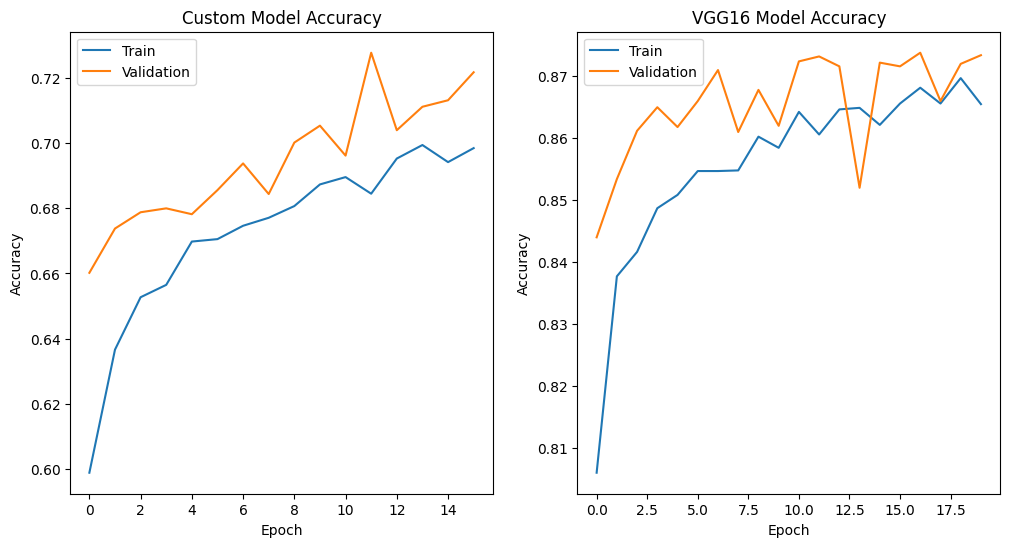

In [7]:
# Ploting training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(custom_history.history['accuracy'])
plt.plot(custom_history.history['val_accuracy'])
plt.title('Custom Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['accuracy'])
plt.plot(vgg16_history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

The custom model shows improvement in learning over epochs, but a notable gap between training and validation accuracy suggests it's not generalizing as well as the VGG16 model. The VGG16 model's training and validation accuracies are closely aligned, indicating robust learning and better generalization to unseen data.  The custom model exhibits signs of overfitting as indicated by the increasing gap between training and validation accuracy. The VGG16 model not only outperforms the custom model in terms of accuracy but also demonstrates superior learning dynamics, making it the preferable model for this image classification task.

## Evaluation and Comparison

Found 5000 images belonging to 2 classes.
250/250 [==============================] - 110s 439ms/step


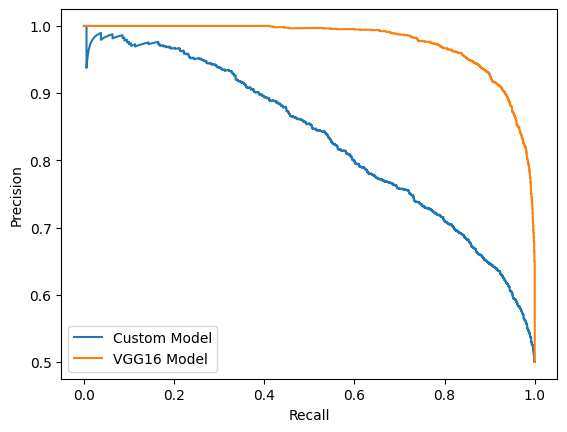

Custom Model Metrics:
Accuracy:  0.7392
Precision:  0.714336917562724
Recall:  0.7972
F1-score:  0.7534971644612476
VGG16 Model Metrics:
Accuracy:  0.9162
Precision:  0.9091624066063704
Recall:  0.9248
F1-score:  0.9169145349990084


In [16]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, f1_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
import os

val_dir = '/content/validation'

# Defined ImageDataGenerator
val_datagen = ImageDataGenerator(rescale=1./255)

# Created a generator for your validation data
val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # For binary classification
    shuffle=False  # Keep data in order
)

# Geting the true labels from the generator
true_labels = val_generator.classes

# Loading the best models
custom_model = load_model('/content/custom_model_best.keras')
vgg16_model = load_model('/content/vgg16_model_best.keras')

# Predicting classes with each model
custom_predictions = custom_model.predict(val_generator)
vgg16_predictions = vgg16_model.predict(val_generator)

# The predictions are in probabilities for the positive class (e.g., class '1'). To classify, we threshold at 0.5.
custom_predictions_binary = np.where(custom_predictions > 0.5, 1, 0).flatten()
vgg16_predictions_binary = np.where(vgg16_predictions > 0.5, 1, 0).flatten()

# Calculated accuracy
custom_accuracy = accuracy_score(true_labels, custom_predictions_binary)
vgg16_accuracy = accuracy_score(true_labels, vgg16_predictions_binary)

# Calculated precision, recall, F1-score
custom_precision = precision_score(true_labels, custom_predictions_binary)
custom_recall = recall_score(true_labels, custom_predictions_binary)
custom_f1 = f1_score(true_labels, custom_predictions_binary)

vgg16_precision = precision_score(true_labels, vgg16_predictions_binary)
vgg16_recall = recall_score(true_labels, vgg16_predictions_binary)
vgg16_f1 = f1_score(true_labels, vgg16_predictions_binary)

# Calculated precision-recall curve
custom_precision_curve, custom_recall_curve, _ = precision_recall_curve(true_labels, custom_predictions)
vgg16_precision_curve, vgg16_recall_curve, _ = precision_recall_curve(true_labels, vgg16_predictions)

# Ploting precision-recall curve
plt.plot(custom_recall_curve, custom_precision_curve, label='Custom Model')
plt.plot(vgg16_recall_curve, vgg16_precision_curve, label='VGG16 Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Printing out the metrics
print("Custom Model Metrics:")
print("Accuracy: ", custom_accuracy)
print("Precision: ", custom_precision)
print("Recall: ", custom_recall)
print("F1-score: ", custom_f1)

print("VGG16 Model Metrics:")
print("Accuracy: ", vgg16_accuracy)
print("Precision: ", vgg16_precision)
print("Recall: ", vgg16_recall)
print("F1-score: ", vgg16_f1)

Custom Model Incorrect Prediction 1:


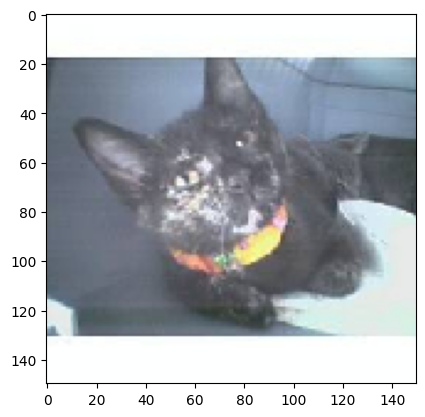

VGG16 Model Incorrect Prediction 1:


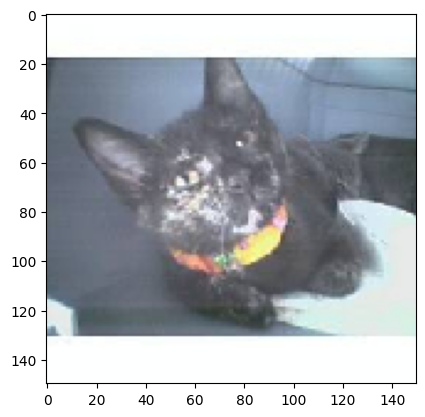

Custom Model Incorrect Prediction 2:


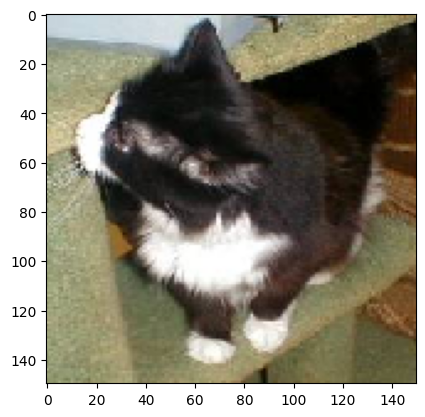

VGG16 Model Incorrect Prediction 2:


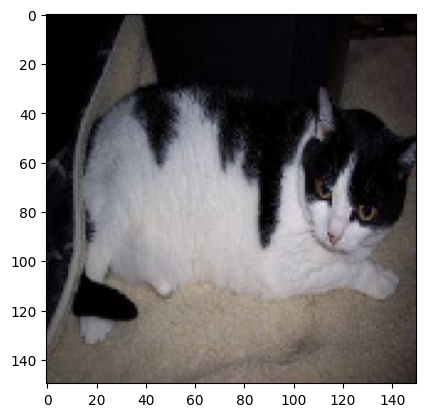

Custom Model Incorrect Prediction 3:


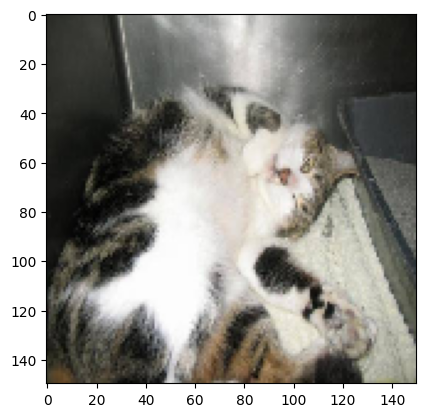

VGG16 Model Incorrect Prediction 3:


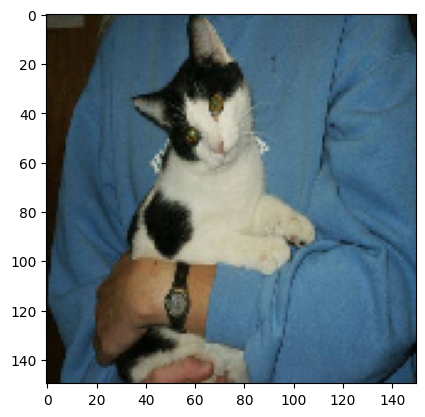

Custom Model Incorrect Prediction 4:


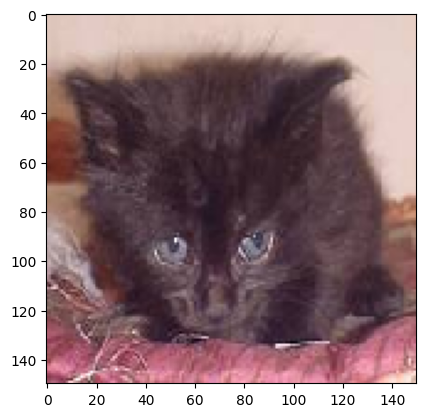

VGG16 Model Incorrect Prediction 4:


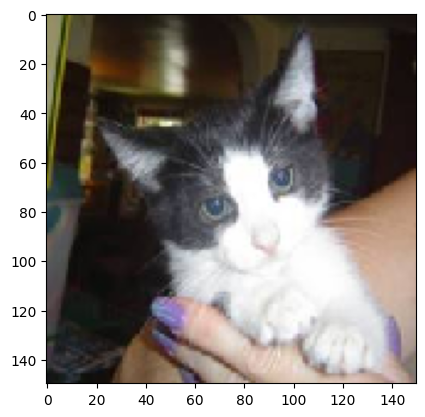

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Loading the validation data labels
val_labels = val_generator.classes

# Precision-Recall curve
custom_precision, custom_recall, _ = precision_recall_curve(val_labels, custom_predictions)
vgg16_precision, vgg16_recall, _ = precision_recall_curve(val_labels, vgg16_predictions)

# Explore specific examples where the model failed to predict correctly
custom_incorrect_indices = np.where(custom_predictions_binary != val_labels)[0]
vgg16_incorrect_indices = np.where(vgg16_predictions_binary != val_labels)[0]

# Display the incorrect predictions for each model
for i in range(min(4, len(custom_incorrect_indices), len(vgg16_incorrect_indices))):
    print(f"Custom Model Incorrect Prediction {i+1}:")
    val_generator.reset()
    for _ in range(custom_incorrect_indices[i] // val_generator.batch_size):
        val_images, _ = next(val_generator)
    plt.imshow(val_images[custom_incorrect_indices[i] % val_generator.batch_size])
    plt.show()
    print(f"VGG16 Model Incorrect Prediction {i+1}:")
    val_generator.reset()
    for _ in range(vgg16_incorrect_indices[i] // val_generator.batch_size):
        val_images, _ = next(val_generator)
    plt.imshow(val_images[vgg16_incorrect_indices[i] % val_generator.batch_size])
    plt.show()

## Conclusion

In this lab, we have conducted a comprehensive analysis and classification of images into two categories: dogs and cats. Utilizing the dataset of 5000 images, we have built and compared two different models: a custom neural network and a pre-trained VGG16 network that we fine-tuned for our specific task.

The custom model provided us with decent results, achieving an accuracy of 73.92%. Its precision rate was 71.43%, with a slightly higher recall of 79.72%, leading to an F1-score of 75.35%. The precision-recall curve for the custom model shows a rapid decline in precision as recall increases, indicating that while it can identify a large fraction of positive class samples (high recall), it does so at the expense of accuracy (lower precision).

On the other hand, the VGG16 model exhibited superior performance across all metrics. With an accuracy of 91.62%, it showed a marked improvement over the custom model. The precision and recall rates were also higher at 90.92% and 92.48%, respectively, resulting in an F1-score of 91.69%. The precision-recall curve for the VGG16 model is consistently above the custom model, indicating a better balance between precision and recall across different thresholds.

The difference in performance between the custom and VGG16 models can be attributed to several factors. The VGG16 model benefits from having been pre-trained on a large dataset (ImageNet), allowing it to transfer learned features to our task effectively. The depth and complexity of the VGG16 architecture also give it a greater capacity to learn from and generalize over our dataset.

In summary, the VGG16 model not only provided higher accuracy but also demonstrated a more balanced trade-off between precision and recall, as visualized in the precision-recall curve. This suggests that fine-tuning pre-trained models, such as VGG16, can be a highly effective strategy for image classification tasks, especially when compared to training custom models from scratch.

References : 

Class Notebook:  https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/05C_dogs_vs_cats_cnn_and_data_augmentation.ipynb
kaggle omar : https://www.kaggle.com/code/omarmostafataha/transfer-learning-vgg16-deployment-with-gradio